In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyabf
import efel

In [22]:
def replace_none_with_empty_str(some_dict):
    return {k: ('' if v is None else v) for k, v in some_dict.items()}

# Main function
def intrinsic_properties(data):
    
    # Set variables using abf file data
    abf = pyabf.ABF(data)
    time = abf.sweepX*1000 # in miliseconds
    voltage = abf.sweepY
    current = abf.sweepC

    # Define the result outputs for the table
    a = list(efel.getFeatureNames())
    table = pd.DataFrame(columns=[a])
    #b = [4,10,15,19,24]

    # Loop function
    for sweep in abf.sweepList: # Define sweeps for analysis (e.g. abf.sweepList[1:3] to select the range)
        abf.setSweep(sweep)

        # Defines a trace
        trace = {'T': abf.sweepX*1000, 
                 'V': abf.sweepY,
                 'stim_start': [2609.35], # Define region of sweep for analysis (e.g. step was from 2609.35-3609.3 ms)
                 'stim_end': [3609.3]}   # in milliseconds
        traces = [trace]

        # Define the parameters for detection
        efel.api.setThreshold(0) # Voltage threshold for detection
        efel.api.setDerivativeThreshold(0) # dV/dt threshold for detection

        # Define the output results
        feature_values = efel.getFeatureValues(traces,
                                               a,
                                               raise_warnings=None)[0] # If true, returns warnings
        feature_values = replace_none_with_empty_str(feature_values)

        # Optional: add a column with the current steps
        current = abf.sweepC
        currents = [] # Current value between t1 and t2 (ms) for each step
        t1 = int(trace['stim_start'][0]*abf.dataPointsPerMs) 
        t2 = int(trace['stim_end'][0]*abf.dataPointsPerMs)
        current_mean = np.average(abf.sweepC[t1:t2])
        currents.append(current_mean)


        # Create table from the results 
        length = len(table)
        table.loc[length, 'Current_step'] = current_mean
        for i in a:
            if (len(feature_values[i]) == 0):
                continue
            else:
                table.loc[length, i] = feature_values[i][0]
        table.loc[length, 'Spikecount'] = feature_values['Spikecount'][0] 

        # Some features requires AP > 0 or more
        if feature_values['Spikecount'] is not None: 
            table.loc[length, 'Latency_ms'] = feature_values['time_to_first_spike']
            if feature_values['Spikecount'] > 4:  
                table.loc[length, 'adaptation'] = feature_values['adaptation_index'][0]
                table.loc[length, 'ISI_CV'] = feature_values['ISI_CV'][0] 
                table.loc[length, 'ISI_mean'] = feature_values['ISI_values'][0]/1000

    # Optional: ploting the trace
    fig = plt.figure(figsize=(12, 4))
    ax1 = fig.add_subplot(121)
    for sweep in abf.sweepList:
        abf.setSweep(sweep)
        ax1.plot(abf.sweepX*1000, abf.sweepY, alpha=0.3)
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Membrane voltage (mV)')

    # Plot an individual trace
    ax2 = fig.add_subplot(122, sharey=ax1)
    sweep_label = abf.setSweep(20) 
    ax2.plot(time, voltage, label='sweep 20')
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Membrane voltage (mV)')
    plt.tight_layout()

    # Optional : Export the graph and the table
    fig.savefig(data + '.png', dpi=300)
    table.to_csv(data + '.csv')

    # Display the graph and the table
    plt.show()
    return(table)

# Loops through a given folder
def intrinsic_properties_loop(folder):
    for i in os.listdir(folder):
        if i.endswith('.abf'):
            intrinsic_properties(i)

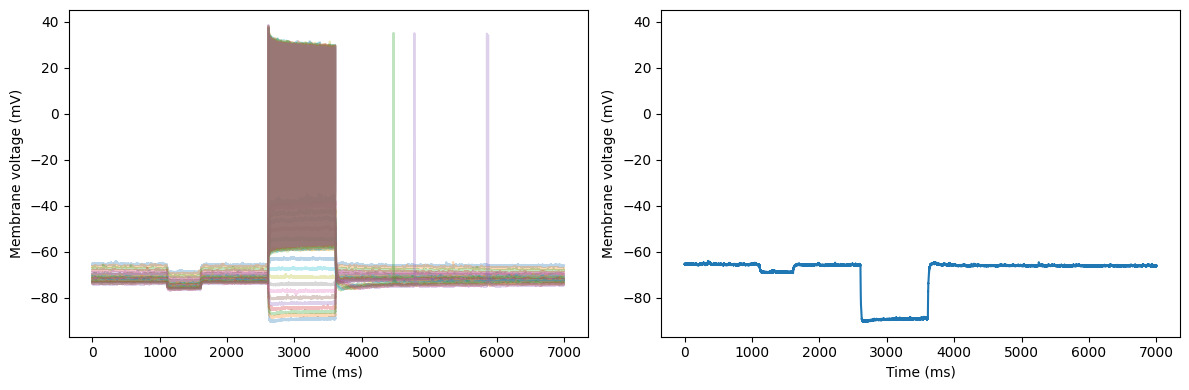

,ADP_peak_amplitude,ADP_peak_indices,ADP_peak_values,AHP1_depth_from_peak,AHP2_depth_from_peak,AHP_depth,AHP_depth_abs,AHP_depth_abs_slow,AHP_depth_diff,AHP_depth_from_peak,...,initburst_sahp,initburst_sahp_vb,initburst_sahp_ssse,depol_block,depol_block_bool,spikes_per_burst,Current_step,Latency_ms,adaptation,ISI_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,NaN,-200.0,,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,NaN,-175.0,,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,NaN,-150.0,,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,NaN,-125.0,,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,NaN,-100.0,,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,NaN,-75.0,,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,NaN,-50.0,,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,NaN,-25.0,,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,NaN,0.0,,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,NaN,25.0,,NaN,NaN


In [23]:
# Load your .abf file
data = r"C:\Users\Valerie\Documents\Tejeda_Lab\4_ephys_data\TBI-MOR\atf3-notinj\2023_05_01_0009.abf"

intrinsic_properties(data)